<img style="float: left;" src="earth-lab-logo-rgb.png" width="150" height="150" />

# Earth Analytics Education - EA  Python Course Spring 2021

## Important  - Assignment Guidelines

1. Before you submit your assignment to GitHub, make sure to run the entire notebook with a fresh kernel. To do this first, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart & Run All)
2. Always replace the `raise NotImplementedError()` code with your code that addresses the activity challenge. If you don't replace that code, your notebook will not run.

```
# YOUR CODE HERE
raise NotImplementedError()
```

3. Any open ended questions will have a "YOUR ANSWER HERE" within a markdown cell. Replace that text with your answer also formatted using Markdown.
4. **DO NOT RENAME THIS NOTEBOOK File!** If the file name changes, the autograder will not grade your assignment properly.
6. When you create a figure, comment out `plt.show()` to ensure the autograder can grade your plots. For figure cells, DO NOT DELETE the code that says `DO NOT REMOVE LINE BELOW`.

```
### DO NOT REMOVE LINE BELOW ###
student_plot1_ax = nb.convert_axes(plt)
```

* Only include the package imports, code, and outputs that are required to run your homework assignment.
* Be sure that your code can be run on any operating system. This means that:
   1. the data should be downloaded in the notebook to ensure it's reproducible
   2. all paths should be created dynamically using the `os.path.join`

## Follow to PEP 8 Syntax Guidelines & Documentation

* Run the `autopep8` tool on all cells prior to submitting (HINT: hit shift + the tool to run it on all cells at once!
* Use clear and expressive names for variables. 
* Organize your code to support readability.
* Check for code line length
* Use comments and white space sparingly where it is needed
* Make sure all python imports are at the top of your notebook and follow PEP 8 order conventions
* Spell check your Notebook before submitting it.

For all of the plots below, be sure to do the following:

* Make sure each plot has a clear TITLE and, where appropriate, label the x and y axes. Be sure to include UNITS in your labels.


### Add Your Name Below 
**Your Name:** Libby Ives

<img style="float: left;" src="colored-bar.png"/>

---

# Week 04 and 05 Homework - Automate NDVI Workflow

For this assignment, you will write code to generate a plot of the mean normalized difference vegetation index (NDVI) for two different sites in the United States across one year of data:

* San Joaquin Experimental Range (SJER) in Southern California, United States
* Harvard Forest (HARV) in the Northeastern United States

The data that you will use for this week is available from **earthpy** using the following download: 

`et.data.get_data('ndvi-automation')`

## Assignment Goals

Your goal in this assignment is to create the most efficient and concise workflow that you can that allows for:

1. The code to scale if you added new sites or more time periods to the analysis.
2. Someone else to understand your workflow.
3. The LEAST and most efficient (i.e. runs fast, minimize repetition) amount of code that completes the task.

### HINTS

* Remove values outside of the landsat valid range of values as specified in the metadata, as needed.
* Keep any output files SEPARATE FROM input files. Outputs should be created in an outputs directory that is created in the code (if needed) and/or tested for.
* Use the functions that we demonstrated during class to make your workflow more efficient.
* BONUS - if you  chose - you can export your data as a csv file. You will get bonus points for doing this.


## Assignment Requirements

Your submission to the GitHub repository should include:
* This Jupyter Notebook file (.ipynb) with:
    * The code to create a plot of mean NDVI across a year for  2 NEON Field Sites:
        * NDVI on the x axis and formatted dates on the y for both NEON sites on one figure/axis object
    * The **data should be cleaned to remove the influence of clouds**. See the [earthdatascience website for an example of what your plot might look like with and without removal of clouds](https://www.earthdatascience.org/courses/earth-analytics-python/create-efficient-data-workflows/).
* BONUS: Create one output `.csv` file that has 3 columns - NDVI, Date and Site Name - with values for SJER and HARV.

Your notebook should:
* Have *at least* 2 well documented and well named functions with docstrings.
* Include a Markdown cell at the top of the notebook that outlines the overall workflow using pseudocode (i.e. plain language, not code)
* Include additional Markdown cells throughout the notebook to describe: 
    * the data that you used - and where it is from
    * how data are being processing
    * how the code is optimized to run fast and be more concise

# Replace this cell with your pseudocode  for this workflow

If you happen to be a diagram person a diagram is ok too



# Pseudocode And Outline for Landsat8 NDVI Difference Workflow

The purpose of this code is to calcuate the **Nomalized Difference Vegetation Index** (__[NDVI](http://earthobservatory.nasa.gov/features/MeasuringVegetation/measuring_vegetation_2.php)__) for 1 or more discrete sites, for some period of time based on Landsat8 data.

### Primary Code Output:
* Panda dataframe with columns for:
    * Site name
    * Date (in time-series format!)
    * Mean NDVI for site
* This dataframe can be used to make plots and output files

### Code Steps
1. Open bands needed for NDVI: red and infrared
    * go into each scene directory and open bands 4 and 5 (i.e. index 3 and 4)
2. Crop bands to study site boundary
    * there is a site boundary for each site under vector (e.g. `data/ndvi-automation/sites/SJER/vector/`)
3. Calculate NDVI for the scene (i.e. scene - set of bands for a particular spatial area).
    * result is numpy array that contains all NDVI values for all pixels
4. Calculate mean of the NDVI array.
    * result is one mean NDVI value for the scene (to be stored in the Mean NDVI column)
5. Parse directory name for site name.
    * see the cells in the section below on os and glob to help with this task. 
6. Parse directory name or file name for an individual band for the date.
    * see the cells in the section below on os and glob to help with this task. 
7. Add site name, date, and mean_ndvi values to a pandas dataframe.
    * add them to a list and then convert that list to a pandas dataframe
    * add them to individual lists and then create the pandas dataframe by converting each list into a column within the pandas dataframe.
        * add values to list:
        * `.append()`
        * `list_name += [value]`

In [1]:
# Autograding imports - do not modify this cell
import matplotcheck.autograde as ag
import matplotcheck.notebook as nb
import matplotcheck.timeseries as ts
from datetime import datetime

In [2]:
# Import needed packages in PEP 8 order
import os
from glob import glob

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.options.mode.use_inf_as_na = True
import geopandas as gpd
from shapely.geometry import mapping
import rasterio as rio
import xarray as xr
import rioxarray as rxr
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep
import earthpy.mask as em
from matplotlib.dates import DateFormatter

# Set working directory to 'HOME/earth-analytics/data'
earth_analytics_directory_path = os.path.join(
    et.io.HOME, "earth-analytics", "data")

os.chdir(earth_analytics_directory_path)

print ('Your working directory is', earth_analytics_directory_path)


Your working directory is C:\Users\libby\earth-analytics\data


In [3]:
# DO NOT MODIFY THIS CELL
# Tests that the working directory is set to earth-analytics/data

path = os.path.normpath(os.getcwd())
student_wd_parts = path.split(os.sep)

if student_wd_parts[-2:] == ['earth-analytics', 'data']:
    print("\u2705 Great - it looks like your working directory is set correctly to ~/earth-analytics/data")
else:
    print("\u274C Oops, the autograder will not run unless your working directory is set to earth-analytics/data")

✅ Great - it looks like your working directory is set correctly to ~/earth-analytics/data


### Use the cell below to download your data to your working directory


* There should be a unique folder for each site you want to analyze
    - The name of the each site's folder should be the name you want to label the site
    
    
* Each site folder should contain two subfolders:
    - ***vector***: contains a shape file of the site AOI
    - ***landsat-crop***: contains subfolders with landsat8 files for each time slice from that site

In [4]:
# Download datasets in this cell to your current working directory
ndvi_data = et.data.get_data('ndvi-automation')
ndvi_path = os.path.join(ndvi_data,'sites')
ndvi_path

'C:\\Users\\libby\\earth-analytics\\data\\ndvi-automation\\.\\sites'

# Figure 1: Plot 1 - Mean NDVI For Each Site Across the Year (50 points)

Create a plot of the mean normalized difference vegetation index (NDVI) for the two different sites in the United States across the year: 

* NDVI on the x axis and formatted dates on the y for both NEON sites on one figure/axis object.
* Each site should be identified with a different color in the plot and legend.
* The final plot **data should be cleaned to remove the influence of clouds**.
* Be sure to include appropriate title and axes labels.

Add additional cells as needed for processing data (e.g. defining functions, etc), but be sure to:
* follow the instructions in the code cells that have been provided to ensure that you are able to use the sanity check tests that are provided. 
* include only the plot code in the cell identified for the final plot code below

## Task 1: 

In the cell below, create a single dataframe containing MEAN NDVI, the site name, 
and the date of the data for the HARV site 
scene `HARV/landsat-crop/LC080130302017031701T1-SC20181023151837`.  The column names for the  final
DataFrame should be`mean_ndvi`, and `site`, and the data should be **indexed on the date**. 

Use the functions that we reviewed in class (or create your own versions of them) to implement your code

### In the Cell below Place  All Functions Needed to Run this Notebook (20 points)

In [5]:
### DO NOT REMOVE THIS LINE OR EDIT / MOVE THIS CELL ###
start_time = datetime.now()

In [6]:
def calculate_mean_ndvi_clouds(folder_path):
    '''

    Parameters
    ----------
    input_folder: string
        this is a string to the file path containing all site folders you wish
        to analyze

    Returns
    -------
    results: pandas dataframe
        a date-time indexed dataframe with columns for "mean_ndvi" and "site"

    '''
    # Define paths to data
    landsat_path = folder_path

    # Get site name from folder title
    path_components = landsat_path.split(os.sep)
    sitename = path_components[8]

    # Open site boundary shapefile
    site_boundary_path = os.path.commonpath(
        glob(os.path.join(ndvi_path, sitename, '*', '*.shp')))
    site_boundary = gpd.read_file(site_boundary_path)

    # Remove clouds
    bands_path_pre = glob(os.path.join(landsat_path, "*band[4-5]*.tif"))
    bands_path_pre.sort()
    bands_pre_cloud = combine_tifs(bands_path_pre)
    cloud_mask = mask_clouds(landsat_path)
    bands_post_cloud = bands_pre_cloud.where(~cloud_mask)

    # Open Landsat8 data bands 4 (red) & 5 (near infrared)
    red_band = bands_post_cloud[0]
    nir_band = bands_post_cloud[1]

    # Crop Landsat Data (make sure projections match!)
    red_band_clip = red_band.rio.clip(
        site_boundary.geometry.apply(mapping), site_boundary.crs)
    nir_band_clip = nir_band.rio.clip(
        site_boundary.geometry.apply(mapping), site_boundary.crs)

    # Calculate NDVI
    top = (nir_band_clip-red_band_clip)
    bottom = (nir_band_clip+red_band_clip)
    site_ndvi = top/bottom

    # Calculate mean NDVI
    ndvi_mean = site_ndvi.mean()
    if isinstance(ndvi_mean, float) == True:
        next
    else:
        ndvi_mean = xr.DataArray.to_pandas(ndvi_mean)

    # Find date and site name
    slice_name = os.path.basename(os.path.normpath(landsat_path))
    date_name = slice_name[10:18]

    # Add values to Dataframe
    temp_df = pd.DataFrame({"site": [sitename],
                            "mean_ndvi": [ndvi_mean],
                            "date": [date_name]})

    temp_df['date'] = pd.to_datetime(temp_df['date'])
    temp_df = temp_df.set_index('date')

    return temp_df



def combine_tifs(tif_list):
    """A function that combines a list of tifs in the same CRS
    and of the same extent into an xarray object

    Parameters
    ----------
    tif_list : list
        A list of paths to the tif files that you wish to combine.

    Returns
    -------
    An xarray object with all of the tif files in the listmerged into 
    a single object.

    """

    out_xr = []
    for i, tif_path in enumerate(tif_list):
        out_xr.append(rxr.open_rasterio(tif_path, masked=True).squeeze())
        out_xr[i]["band"] = i+1

    return xr.concat(out_xr, dim="band")


def mask_clouds(input_path):
    """
    This function uses the landsat qa.tif to mask areas on the image that are
    likely clouds, cloud shadows, or shadows.
    
    Parameter
    ---------
    input_path: an os-formatted path
        Path to a folder that includes a qa.tif landsat file
    
    Returns
    -------
    cloud mask: list
        A list of masked values. This list  can then be used to masked stacked
        landsat tifs of the same dimensions of the qa file using the function:
        `stacked_tifs_masks = stacked_tifs.where(~cloud_mask)`

    """
    # Mask Clouds
    sample = os.path.commonpath(glob(os.path.join(input_path, "*qa*.tif")))
    landsat_qa = rxr.open_rasterio(sample).squeeze()
    high_cloud_confidence = em.pixel_flags["pixel_qa"]["L8"]["High Cloud Confidence"]
    cloud = em.pixel_flags["pixel_qa"]["L8"]["Cloud"]
    cloud_shadow = em.pixel_flags["pixel_qa"]["L8"]["Cloud Shadow"]
    all_masked_values = cloud_shadow + cloud + high_cloud_confidence

    cloud_mask = landsat_qa.isin(all_masked_values)
    
    return cloud_mask

In [7]:
# Define paths to data
landsat_path = os.path.join(ndvi_path,
    'HARV', 'landsat-crop', 'LC080130302017031701T1-SC20181023151837')

temp_df = calculate_mean_ndvi_clouds(landsat_path)
temp_df

,site,mean_ndvi
date,,
2017-03-17,HARV,0.2821579051696485


In [8]:
# This cell  is testing your data output above

student_ndvi_ts_single_site = _

single_scene_points = 0

# Ensure the data is stored in a dataframe.
if isinstance(student_ndvi_ts_single_site, pd.DataFrame):
    print('\u2705 Your data is stored in a DataFrame!')
    single_scene_points += 1
else:
    print('\u274C It appears your data is not stored in a DataFrame. ',
          'To see what type of object your data is stored in, check its type with type(object)')

# Ensure that the date column is the index
if isinstance(student_ndvi_ts_single_site.index, pd.core.indexes.datetimes.DatetimeIndex):
    print('\u2705 You have the index set to the date column!')
    single_scene_points += 2
else:
    print('\u274C You do not have the index set to the date column.')

# Ensure that the date column is datetime
if isinstance(student_ndvi_ts_single_site.index[0], pd._libs.tslibs.timestamps.Timestamp):
    print('\u2705 The data in your date column is datetime!')
    single_scene_points += 2
else:
    print('\u274C The data in your date column is not datetime.')

# Ensure the site name is correct
if student_ndvi_ts_single_site.site.values[0] == 'HARV':
    print('\u2705 You have the correct site name!')
    single_scene_points += 5
else:
    print('\u274C You do not have the correct site name.')

if np.allclose(0.281131628228094, student_ndvi_ts_single_site.mean_ndvi.values[0]):
    print('\u2705 You have the correct mean NDVI value!')
    single_scene_points += 5
else:
    print('\u274C You do not have the correct mean ndvi value.')

print("\n \u27A1 You received {} out of 15 points for creating a dataframe.".format(
    single_scene_points))
single_scene_points

✅ Your data is stored in a DataFrame!
✅ You have the index set to the date column!
✅ The data in your date column is datetime!
✅ You have the correct site name!
❌ You do not have the correct mean ndvi value.

 ➡ You received 10 out of 15 points for creating a dataframe.


10

## Task 2:

In the cell below, process all of the landsat scenes. Create a DataFrame that contains the following 
information for each scene


|   | index  | site  | mean_ndvi  | 
|---|---|---|---|
| Date  |   |   |   |
|  2017-01-07  | 0  | SJER  | .4  |  

Be sure to call your dataframe at the end of the cell to ensure autograding works.
HINT: FOR THIS STEP, leave any rows containing missing values (`NAN`).

In [9]:
# Create dataframe of NDVI including the cleaning data to deal with clouds

# Test Cell
sites = glob(ndvi_path + '/*/')
results = pd.DataFrame()

for site in sites:
    ls_data_list = glob(site + 'landsat-crop'+'/*/')

    for folder in ls_data_list:
        temp_df = calculate_mean_ndvi_clouds(folder)
        results = results.append(temp_df)

results

,site,mean_ndvi
date,,
2017-01-12,HARV,nan
2017-01-28,HARV,nan
2017-02-13,HARV,nan
2017-03-01,HARV,nan
2017-03-17,HARV,0.2821579051696485
2017-04-02,HARV,0.2512478931112462
2017-04-18,HARV,0.5410801238000957
2017-05-04,HARV,0.5689237374289202
2017-05-20,HARV,0.8113103647212354


In [10]:
# Last sanity check before creating your plot (10 points)

# Ensure that you call your dataframe at the bottom of the cell above
# and that it has columns called: mean_ndvi and site

# Ensure the data is stored in a dataframe.
student_ndvi_df = _

df_points = 0

if isinstance(student_ndvi_df, pd.DataFrame):
    print('\u2705 Your data is stored in a DataFrame!')
    df_points += 2
else:
    print('\u274C It appears your data is not stored in a DataFrame. ',
          'To see what type of object your data is stored in, check its type with type(object)')

# Check that dataframe contains the appropriate number of NAN values
if student_ndvi_df.mean_ndvi.isna().sum() == 15:
    print('\u2705 Correct number of masked data values!')
    df_points += 2
else:
    print('\u274C The amount of null data in your dataframe is incorrect.')


# Ensure that the date column is the index
if isinstance(student_ndvi_df.index, pd.core.indexes.datetimes.DatetimeIndex):
    print('\u2705 You have the index set to the date column!')
    df_points += 3
else:
    print('\u274C You do not have the index set to the date column.')

# Ensure that the date column is datetime
if isinstance(student_ndvi_df.index[0], pd._libs.tslibs.timestamps.Timestamp):
    print('\u2705 The data in your date column is datetime!')
    df_points += 3
else:
    print('\u274C The data in your date column is not datetime.')

# Output for timer, # DO NOT MODIFY
end_time = datetime.now()
total_time = end_time - start_time
print(
    "Your total run time for processing the data was {0}.".format(total_time))

print("\n \u27A1 You received {} out of 10 points for creating a dataframe.".format(
    df_points))

df_points

✅ Your data is stored in a DataFrame!
❌ The amount of null data in your dataframe is incorrect.
✅ You have the index set to the date column!
✅ The data in your date column is datetime!
Your total run time for processing the data was 0:00:46.805538.

 ➡ You received 8 out of 10 points for creating a dataframe.


8

<ipython-input-11-c449129f7bac>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(month_names)


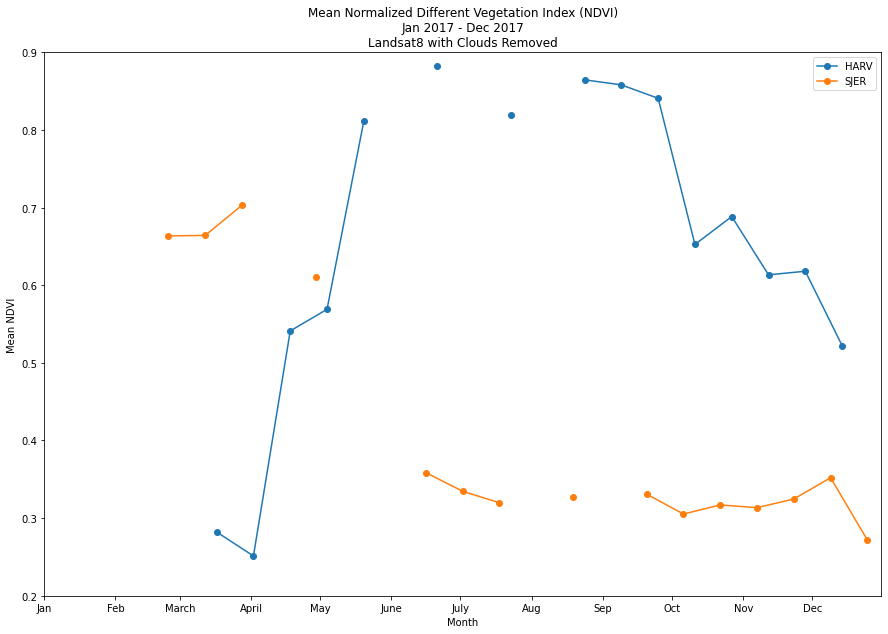

In [11]:
# Plot Cloud-corrected mean NDVI by month

# Drop Nans
results_noNan = results.dropna(axis=0, how='any')

month_names = ['Jan', 'Feb', 'March', 'April', 'May',
               'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
sites = results.site.unique()
fig, ax = plt.subplots(figsize=(15, 10))
ax.set_title(
    'Mean Normalized Different Vegetation Index (NDVI)\nJan 2017 - Dec 2017\nLandsat8 with Clouds Removed')

for site in sites:
    temp_df = results[results["site"] == site]
    ax.plot(temp_df.index.values,
            temp_df['mean_ndvi'],
            'o-',
            label=site)

# Format Y-axis
ax.set_ylabel('Mean NDVI')
ax.set_ylim(0.2, 0.9)

# Format X-axis
date_form = DateFormatter('%m')
ax.xaxis.set_major_formatter(date_form)
ax.set_xlabel('Month')
ax.set_xlim('2017-01', '2017-12-31')
ax.set_xticklabels(month_names)

# Plot Legend
plt.legend()


### DO NOT REMOVE LINES BELOW ###
final_masked_solution = nb.convert_axes(plt, which_axes="current")

In [12]:
# Ignore this cell for the autograding tests


In [13]:
# Ignore this cell for the autograding tests


# Question 1 (10 points)

Imagine that you are planning NEON’s upcoming flight season to capture remote sensing data in these locations and want to ensure that you fly the area when the vegetation is the most green.

When would you recommend the flights take place for each site? 

Answer the question in 2-3 sentences in the Markdown cell below.

The flights for the SJER site should take place sometime in th early spring (late March - early April) in order to capture the maximum green vegetation. For the HARV site, the flights could take place any time during the summer (Memorial day - Labor day).

# Question 2 (10 points)

How could you modify your workflow to look at vegetation changes over time in each site? 

Answer the question in 2-3 sentences in the Markdown cell below.

If you wanted to look at these changes from year to year, the workflow could be mostlt kept the same for the import of the landsat data and calculation of the mean NDVI, but how data is subsetted for the plotting of data would have to change. One could also add a date range when importing landsat data (for emaple, if you only wanted to see images from 15-March to 30-April for any given year).

# Do not edit this cell! (10 points)

The notebook includes:
* additional Markdown cells throughout the notebook to describe: 
    * the data that you used - and where it is from
    * how data are being processing
    * how the code is optimized to run fast and be more concise

# Do not edit this cell! (20 points)

The notebook will also be checked for overall clean code requirements as specified at the **top** of this notebook. Some of these requirements include (review the top cells for more specifics): 

* Notebook begins at cell [1] and runs on any machine in its entirety.
* PEP 8 format is applied throughout (including lengths of comment and code lines).
* No additional code or imports in the notebook that is not needed for the workflow.
* Notebook is fully reproducible. This means:
   * reproducible paths using the os module.
   * data downloaded using code in the notebook.
   * all imports at top of notebook.

## BONUS - Export a  .CSV File to Share (10 points possible)

This is optional - if you export a **.csv** file with the columns specified above: Site, Date and NDVI Value you can get an additional 10 points.

* FULL CREDIT: File exists in csv format and contains the columns specified.
We will check your github repo for this file!


In [14]:
# Export CSV file
# Create an output path for file
output_csv = os.path.join('H:', 'earth-analytics', 'earth-analytics-python',
                          'ea-2021-04-ndvi-automation-lrwives', 'final.csv')
results.to_csv(output_csv)